## Survivor Data Analysis Project

### Introduction to Data

This data is found in an R package called survivoR which contains a collection of data sets with information from the Survivor show from multiple countries: US, Australia, South Africa, and New Zealand. It contains castaway information, vote history, immunity and reward challenge winners, jury votes, advantage details and much more. 

Our goal is to find the attributes which can be used to predict the winner of the Survivor season.

### Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import os

In [2]:
data_dir = 'C:/Users/caroc/OneDrive/Desktop/SurvivorProject/survivorData'

### Read in csv files as Dataframes

In [3]:
# List of CSV file names
csv_files = [
    'advantage_movement.csv',
    'boot_mapping.csv',
    'castaways.csv',
    'castaway_details.csv',
    'challenge_description.csv',
    'challenge_results.csv',
    'confessionals.csv',
    'jury_votes.csv',
    'screen_time.csv',
    'season_palettes.csv',
    'season_summary.csv',
    'survivor_auction.csv',
    'tribe_colours.csv',
    'tribe_mapping.csv',
    'viewers.csv',
    'vote_history.csv'
]

# Create a dictionary to store the DataFrames
dataframes = {}

# Loop through each CSV file and read its data into a DataFrame
for csv_file in csv_files:
    # Specify the relative path to the CSV file
    file_path = os.path.join(data_dir, csv_file)
    
    # Read the data from the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Store the DataFrame in the dictionary
    dataframes[csv_file] = df
    
    # Print the head of the DataFrame
    # print(f'{csv_file}:')
    # print(df.head())
    
# Print out the head of the castaways.csv data
print(dataframes['castaways.csv'].head())

  version version_season               season_name  season        full_name  \
0      AU           AU01  Survivor Australia: 2016       1       Des Quilty   
1      AU           AU01  Survivor Australia: 2016       1  Bianca Anderson   
2      AU           AU01  Survivor Australia: 2016       1       Evan Jones   
3      AU           AU01  Survivor Australia: 2016       1   Peter Fiegehen   
4      AU           AU01  Survivor Australia: 2016       1        Barry Lea   

  castaway_id castaway  age            city state  episode   day  order  \
0      AU0001      Des   59  Sunshine Coast   QLD      1.0   2.0    1.0   
1      AU0002   Bianca   36       Melbourne   VIC      2.0   5.0    2.0   
2      AU0003     Evan   30       Melbourne   VIC      3.0   8.0    3.0   
3      AU0004    Peter   62        Canberra   ACT      4.0  10.0    4.0   
4      AU0005    Barry   44          Cairns   QLD      6.0  14.0    5.0   

          result jury_status original_tribe  result_number  
0  1st voted 

In [4]:
advantage_movement = dataframes['advantage_movement.csv']
boot_mapping = dataframes['boot_mapping.csv']
castaway_details =  dataframes['castaway_details.csv']
castaways =  dataframes['castaways.csv']
challenge_description =  dataframes['challenge_description.csv']
challenge_results =  dataframes['challenge_results.csv']
confessionals =  dataframes['confessionals.csv']
jury_votes =  dataframes['jury_votes.csv']
screen_time =  dataframes['screen_time.csv']
season_palettes =  dataframes['season_palettes.csv']
season_summary =  dataframes['season_summary.csv']
survivor_autction =  dataframes['survivor_auction.csv']
tribe_colors =  dataframes['tribe_colours.csv']
tribe_mapping =  dataframes['tribe_mapping.csv']
viewers =  dataframes['viewers.csv']
vote_history =  dataframes['vote_history.csv']

## Data Exploration

#### Season Summary

This table contains summary details of each season of Survivor, including the winner, runner ups and location.

In [70]:
season_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   version           62 non-null     object 
 1   version_season    62 non-null     object 
 2   season_name       62 non-null     object 
 3   season            62 non-null     int64  
 4   n_cast            62 non-null     int64  
 5   location          60 non-null     object 
 6   country           62 non-null     object 
 7   tribe_setup       62 non-null     object 
 8   full_name         61 non-null     object 
 9   winner_id         61 non-null     object 
 10  winner            61 non-null     object 
 11  runner_ups        61 non-null     object 
 12  final_vote        61 non-null     object 
 13  timeslot          48 non-null     object 
 14  premiered         62 non-null     object 
 15  ended             62 non-null     object 
 16  filming_started   62 non-null     object 
 17 

#### Castaways

This data contains season and demographic information about each castaway with the results for each season. Castaways that have played in more than one season are features more than once with their age and location representing that point in time. 

Each castaway has a unique castaway_id which links the individual across all the data sets and seasons. It also links to the following ID’s found on the vote_history, jury_votes and challenges data sets.

    - vote_id
    - voted_out_id
    - finalist_id

In [7]:
castaways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204 entries, 0 to 1203
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version         1204 non-null   object 
 1   version_season  1204 non-null   object 
 2   season_name     1204 non-null   object 
 3   season          1204 non-null   int64  
 4   full_name       1204 non-null   object 
 5   castaway_id     1204 non-null   object 
 6   castaway        1204 non-null   object 
 7   age             1204 non-null   int64  
 8   city            1189 non-null   object 
 9   state           1185 non-null   object 
 10  episode         1195 non-null   float64
 11  day             1195 non-null   float64
 12  order           1195 non-null   float64
 13  result          1195 non-null   object 
 14  jury_status     519 non-null    object 
 15  original_tribe  1204 non-null   object 
 16  result_number   9 non-null      float64
dtypes: float64(4), int64(2), object(1

#### Castaway Details

This dataset has more detailed information about each castaway including name changes for castaways that have played multiple times. It also includes gender, data of birth, occupation, race and ethnicity data. If no source was found to determine a castaways race and ethnicity, the data is kept as missing rather than making an assumption. This makes it more difficult for us to use attributes such as race and ethnicity which only have 211 and 113 non-null values, respectively. 

In [10]:
castaway_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   castaway_id         977 non-null    object
 1   full_name           975 non-null    object
 2   full_name_detailed  975 non-null    object
 3   castaway            977 non-null    object
 4   date_of_birth       763 non-null    object
 5   date_of_death       13 non-null     object
 6   gender              977 non-null    object
 7   race                211 non-null    object
 8   ethnicity           113 non-null    object
 9   poc                 662 non-null    object
 10  occupation          937 non-null    object
 11  personality_type    656 non-null    object
dtypes: object(12)
memory usage: 91.7+ KB


#### Advantage Movement

This table tracks who found an advantage, who they may have handed it to and who they played for. Each step is called an event and the sequence_id tracks the logical step of the advantage. 

In [6]:
advantage_movement.head()

,version,version_season,season_name,season,castaway,castaway_id,advantage_id,sequence_id,day,episode,event,played_for,played_for_id,success,votes_nullified
0,AU,AU01,Survivor Australia: 2016,1,Brooke,AU0018,AUAD0101,1,29.0,NaN,Found,NaN,NaN,NaN,NaN
1,AU,AU01,Survivor Australia: 2016,1,Sam,AU0019,AUCA0101,1,48.0,NaN,Won,NaN,NaN,NaN,NaN
2,AU,AU01,Survivor Australia: 2016,1,El,AU0022,AUCA0101,1,48.0,NaN,Won,NaN,NaN,NaN,NaN
3,AU,AU01,Survivor Australia: 2016,1,Lee,AU0023,AUCA0101,1,48.0,NaN,Won,NaN,NaN,NaN,NaN
4,AU,AU01,Survivor Australia: 2016,1,Sam,AU0019,AUCA0101,2,49.0,23.0,Played,NaN,NaN,Yes,NaN


#### Screen Time

This table contains the estimated screen time for each castaway during an episode. It is under development and only contains data for Season 42 (148 values) so we may not be able to use this data to make predictions for all seasons. 

In [8]:
screen_time # can't really use only for season 42

,version_season,episode,castaway_id,screen_time
0,US42,1,US0618,148
1,US42,1,US0609,159
2,US42,1,US0622,169
3,US42,1,US0616,176
4,US42,1,US0612,190
...,...,...,...,...
145,US42,13,US0616,1024
146,US42,13,US0623,1058
147,US42,13,US0615,1139
148,US42,13,host,1190


#### Confessionals

This dataset contains the number of confessionals for each castaway by season and episode. There are 11,461 values for the confessional_count attribute so this would be a very good attribute to use in our analysis. 

In [9]:
confessionals.describe()

,season,episode,confessional_count,confessional_time,index_count,index_time
count,11461.000000,11461.000000,11461.000000,541.000000,11461.000000,541.000000
mean,16.061949,6.984818,2.898525,44.911275,0.979591,1.042687
std,13.341147,4.848412,2.755781,50.368379,0.556042,0.667197
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,1.000000,0.000000,0.615385,0.561037
50%,10.000000,6.000000,2.000000,30.000000,0.909412,0.909006
75%,27.000000,10.000000,4.000000,63.000000,1.259546,1.468095
max,44.000000,26.000000,21.000000,307.000000,6.400000,3.763636


#### Challenge Results

In [11]:
challenge_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18142 entries, 0 to 18141
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   version            18142 non-null  object
 1   version_season     18142 non-null  object
 2   season_name        18142 non-null  object
 3   season             18142 non-null  int64 
 4   episode            18142 non-null  int64 
 5   n_boots            18142 non-null  int64 
 6   castaway_id        18142 non-null  object
 7   castaway           18142 non-null  object
 8   tribe              18015 non-null  object
 9   tribe_status       18142 non-null  object
 10  challenge_name     17623 non-null  object
 11  challenge_type     18142 non-null  object
 12  outcome_type       18142 non-null  object
 13  result             18142 non-null  object
 14  chosen_for_reward  18142 non-null  bool  
 15  challenge_id       18142 non-null  object
 16  sit_out            11703 non-null  objec

#### Jury Votes

In [55]:
jury_votes.info()
jury_votes.head(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   version         1353 non-null   object 
 1   version_season  1353 non-null   object 
 2   season_name     1353 non-null   object 
 3   season          1353 non-null   int64  
 4   castaway        1329 non-null   object 
 5   finalist        1329 non-null   object 
 6   vote            1329 non-null   float64
 7   castaway_id     1329 non-null   object 
 8   finalist_id     1329 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 95.3+ KB


,version,version_season,season_name,season,castaway,finalist,vote,castaway_id,finalist_id
0,AU,AU01,Survivor Australia: 2016,1,Nick,Lee,0.0,AU0014,AU0023
1,AU,AU01,Survivor Australia: 2016,1,Kylie,Lee,0.0,AU0015,AU0023
2,AU,AU01,Survivor Australia: 2016,1,Sue,Lee,0.0,AU0016,AU0023
3,AU,AU01,Survivor Australia: 2016,1,Jennah-Louise,Lee,0.0,AU0017,AU0023
4,AU,AU01,Survivor Australia: 2016,1,Brooke,Lee,0.0,AU0018,AU0023
5,AU,AU01,Survivor Australia: 2016,1,Sam,Lee,0.0,AU0019,AU0023
6,AU,AU01,Survivor Australia: 2016,1,Matt,Lee,0.0,AU0020,AU0023
7,AU,AU01,Survivor Australia: 2016,1,Flick,Lee,0.0,AU0021,AU0023
8,AU,AU01,Survivor Australia: 2016,1,El,Lee,1.0,AU0022,AU0023
9,AU,AU01,Survivor Australia: 2016,1,Nick,Kristie,1.0,AU0014,AU0024


#### Vote History

In [57]:
vote_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7942 entries, 0 to 7941
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   version             7942 non-null   object 
 1   version_season      7942 non-null   object 
 2   season_name         7942 non-null   object 
 3   season              7942 non-null   int64  
 4   episode             7942 non-null   int64  
 5   day                 7942 non-null   int64  
 6   tribe_status        7942 non-null   object 
 7   tribe               7942 non-null   object 
 8   castaway            7934 non-null   object 
 9   immunity            797 non-null    object 
 10  vote                7529 non-null   object 
 11  vote_event          481 non-null    object 
 12  vote_event_outcome  457 non-null    object 
 13  split_vote          408 non-null    object 
 14  nullified           7940 non-null   object 
 15  tie                 7837 non-null   object 
 16  voted_

In [52]:
df = vote_history.groupby(['version_season', 'vote'])['vote'].count()
print(df.head(40)) 

version_season  vote         
AU01            Andrew            6
                Barry            10
                Bianca            5
                Brooke            4
                Conner           15
                Craig             2
                Des               7
                El                6
                Evan              5
                Flick             9
                Jennah-Louise     5
                Kat              10
                Kate             10
                Kristie          11
                Kylie            11
                Lee               1
                Matt              6
                Nick             20
                Peter             2
                Phoebe           12
                Rohan             2
                Sam               6
                Sue              15
                Tegan             6
AU02            AK               14
                Adam              5
                Aimee             

### Violin Plot for Age

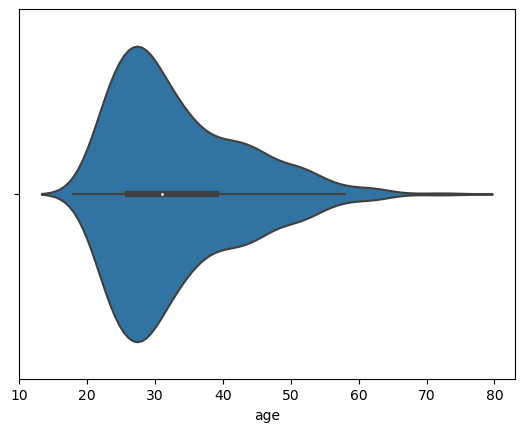

In [5]:
# Create a violin plot of the age column from the castaways.csv data
sns.violinplot(x=dataframes['castaways.csv']['age'])
plt.show()

### Challenge Types Bar Plot

puzzle         250
race          1004
precision      240
endurance      256
strength       159
turn_based     208
balance        274
food            23
knowledge       59
memory          27
fire            41
water          287
dtype: int64


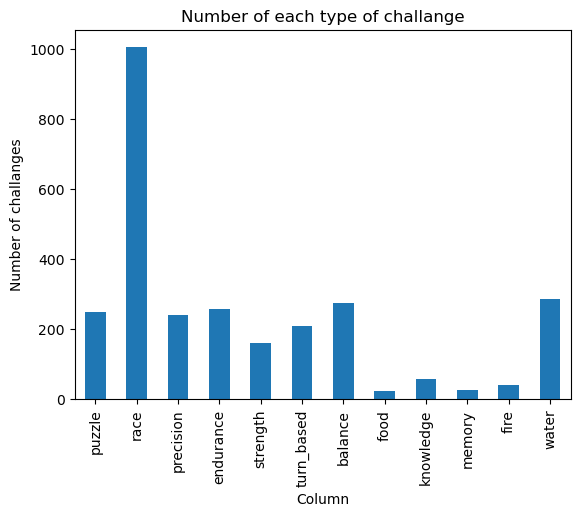

In [59]:
# Count the number of TRUE values in each column from the 3rd column onward
true_counts = (dataframes['challenge_description.csv'].iloc[:, 2:] == True).sum()

# Create a bar chart showing the number of TRUE values in each column
true_counts.plot(kind='bar')

print(true_counts)

# Add labels and title
plt.xlabel('Column')
plt.ylabel('Number of challanges')
plt.title('Number of each type of challange')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Challenge Rewards by Gender

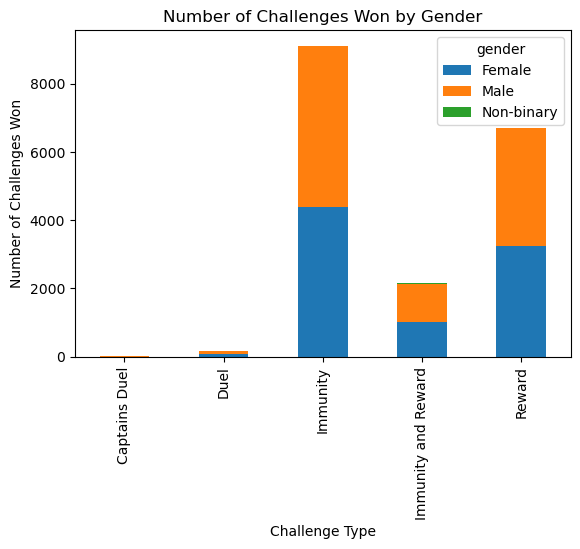

In [60]:
# Merge challenge_results and castaway_details dataframes on castaway_id
merged_df = pd.merge(dataframes['challenge_results.csv'], dataframes['castaway_details.csv'], on='castaway_id')

# Group data by challenge type and gender and count number of challenges won by each group
grouped_df = merged_df.groupby(['challenge_type', 'gender'])['challenge_id'].count().unstack()

# Create a stacked bar chart
grouped_df.plot.bar(stacked=True)

# Add labels and title
plt.xlabel('Challenge Type')
plt.ylabel('Number of Challenges Won')
plt.title('Number of Challenges Won by Gender')

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Adjust the bottom margin of the plot
plt.gcf().subplots_adjust(bottom=0.2)

# Show the plot
plt.show()

### Challenges Won by Gender

gender      Female  Male  Non-binary
race_y        6051  6381           9
precision     1365  1420           4
endurance     1247  1315           3
strength      1168  1168           1
turn_based    1293  1392           0
balance       1446  1504           3
food           125   133           0
knowledge      261   265           0
memory         120   134           0
fire           296   304           0
water         2057  2193           4


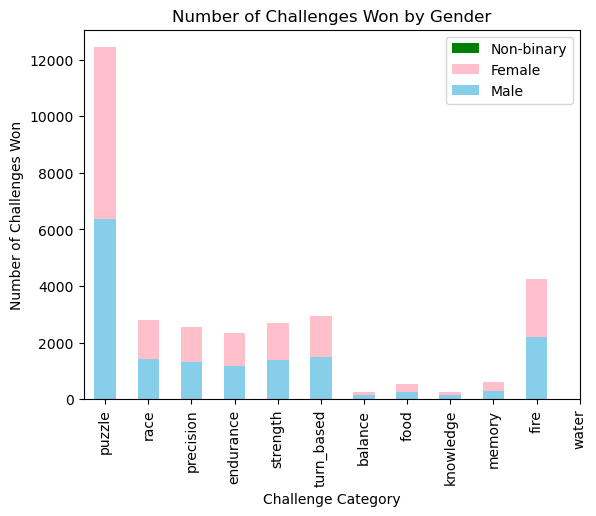

In [61]:
# Remove the last 2 characters of challange_id so it can be used a primary key
dataframes['challenge_description.csv']['challenge_id'] = dataframes['challenge_description.csv']['challenge_id'].str[:-2]

# Merge challenge_results and castaway_details dataframes on castaway_id
castaway_results = pd.merge(dataframes['challenge_results.csv'], dataframes['castaway_details.csv'], on='castaway_id')

# Merge challenge_results and challenge_description dataframes on challenge_id
challenges = pd.merge(castaway_results, dataframes['challenge_description.csv'], on='challenge_id')

# Count the number of challenge categories won grouped by gender
challenges_counts_grouped = (challenges.set_index('gender').iloc[:, 29:] == True).stack().groupby(level=[0, 1]).sum().unstack(level=0)

print(challenges_counts_grouped)

challenges_counts_grouped = challenges_counts_grouped[['Male', 'Female', 'Non-binary']]

# Create a stacked bar chart
bar_chart_axes = challenges_counts_grouped.plot.bar(stacked=True, color={'Male': '#87CEEB', 'Female': 'pink', 'Non-binary': 'green'})

# Get the challenge types from challenge_description.csv
genders = dataframes['challenge_description.csv'].columns[2:]

# Set the xtick labels to the challenge types
plt.xticks(range(len(genders)), genders, rotation=90)

# Add labels and title
plt.xlabel('Challenge Category')
plt.ylabel('Number of Challenges Won')
plt.title('Number of Challenges Won by Gender')

# Change the order of the legend
handles, labels = bar_chart_axes.get_legend_handles_labels()
bar_chart_axes.legend(reversed(handles), reversed(labels))

# Show the plot
plt.show()

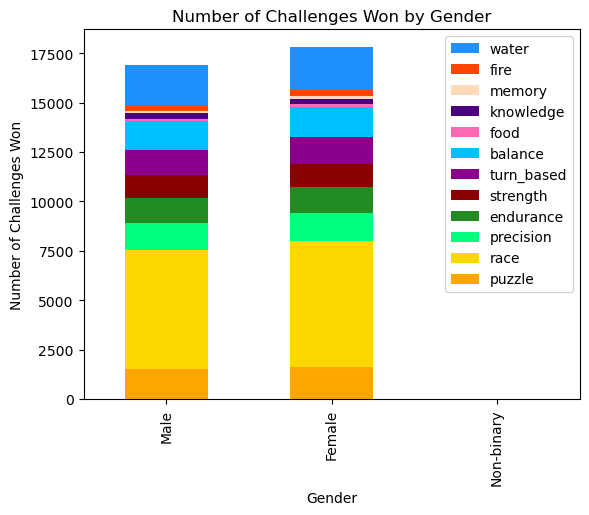

In [62]:
# Count the number of challenge categories won grouped by gender but with gender on the x axis
challenges_counts_grouped = (challenges.iloc[:, 29:] == True).groupby(challenges['gender']).sum()

# Change the column name from 'race_y' to 'race'
challenges_counts_grouped = challenges_counts_grouped.rename(columns={'race_y': 'race'})

# Create a dictionary of colors for each challenge type
colors = {
    'water': '#1E90FF', # dodger blue
    'fire': '#FF4500', # orange red
    'memory': '#FFDAB9', # peach puff
    'knowledge': '#4B0082', # indigo
    'food': '#FF69B4', # hot pink
    'balance': '#00BFFF', # deep sky blue
    'turn_based': '#8B008B', # dark magenta
    'strength': '#8B0000', # dark red
    'endurance': '#228B22', # forest green
    'precision': '#00FF7F', # spring green
    'race': '#FFD700', # gold
    'puzzle': '#FFA500' # orange
}

# Create a stacked bar chart
bar_chart_axes = challenges_counts_grouped.plot.bar(stacked=True, color=colors)

# Get the gender categories for the x axis labels
genders = dataframes['castaway_details.csv']['gender'].unique().tolist()

# Set the xtick labels to the challenge types
plt.xticks(range(len(genders)), genders, rotation=90)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Challenges Won')
plt.title('Number of Challenges Won by Gender')

# Change the order of the legend
handles, labels = bar_chart_axes.get_legend_handles_labels()
bar_chart_axes.legend(reversed(handles), reversed(labels))

# Show the plot
plt.show()

### Season Palettes

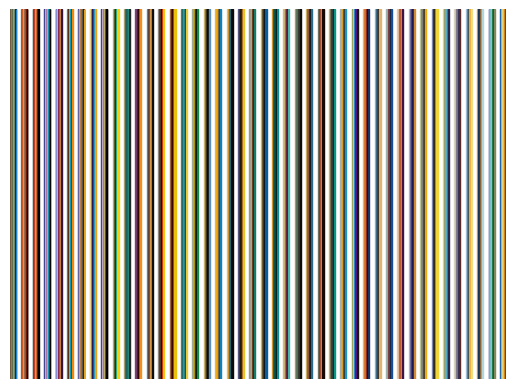

In [63]:
# assuming your DataFrame is named df
colors = dataframes['season_palettes.csv']['palette']
colors = colors.dropna() # Remove any nan values from the colors variable

# Get the unique season values and sort them in ascending order
seasons = dataframes['season_palettes.csv']['season'].unique()
seasons.sort()

# Set the spacing between different season values
spacing = 0.9

fig, ax = plt.subplots()
for season in seasons:
    # Get the colors for the current season
    season_colors = dataframes['season_palettes.csv'][dataframes['season_palettes.csv']['season'] == season]['palette']
    season_colors = season_colors.dropna() # Remove any nan values from the season_colors variable
    n_colors = len(season_colors)
    
    for i, color in enumerate(season_colors):
        ax.add_patch(plt.Rectangle((i/n_colors + (season-1)*(1+spacing), 0), 1/n_colors, 1, color=color))
ax.set_xlim(0, len(seasons)*(1+spacing)-spacing)
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()

### Tribe Colors

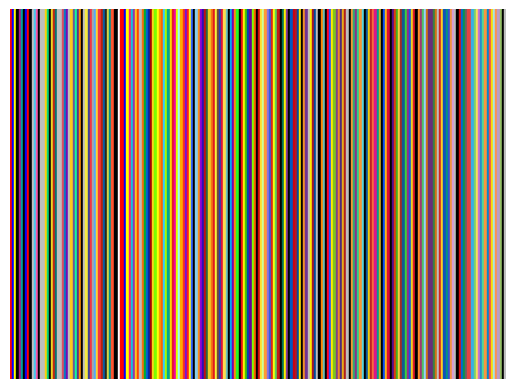

In [64]:
dataframes['tribe_colours.csv']['tribe_status'] = dataframes['tribe_colours.csv']['tribe_status'].astype('category')

# assuming your DataFrame is named df
colors = dataframes['tribe_colours.csv']['tribe_colour']
n_colors = len(colors)

fig, ax = plt.subplots()
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((i/n_colors, 0), 1/n_colors, 1, color=color))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()

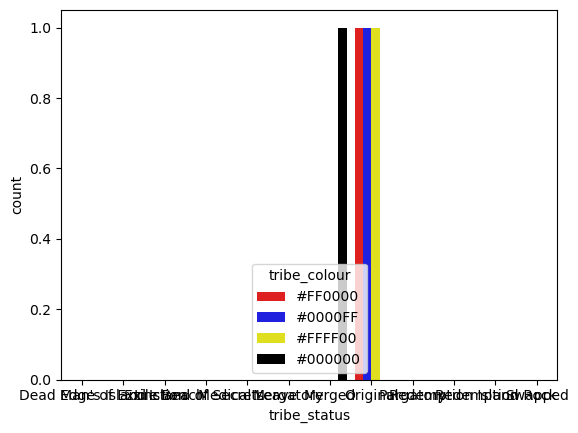

In [65]:
df = dataframes['tribe_colours.csv'][dataframes['tribe_colours.csv']['version_season'] == 'AU01']
# Create a count plot
sns.countplot(data=df, x='tribe_status', hue='tribe_colour', palette=sns.color_palette(df['tribe_colour'].unique()))

# Show the plot
plt.show()

### Viewers over time

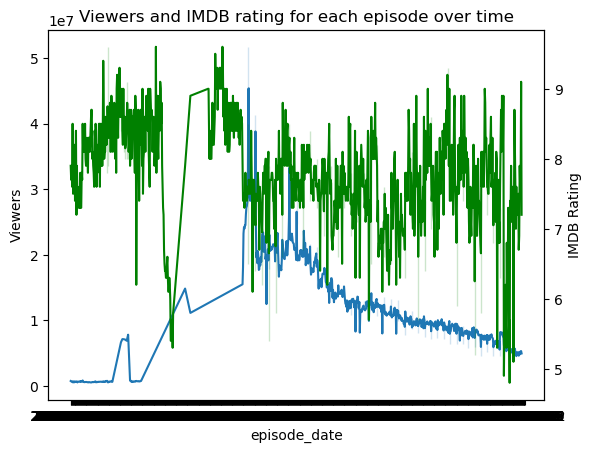

In [66]:
# Create a line plot of viewers over time
fig, ax1 = plt.subplots()
sns.lineplot(data=dataframes['viewers.csv'], x='episode_date', y='viewers', ax=ax1)

# Create a secondary y-axis on the right side of the chart
ax2 = ax1.twinx()

# Create a line plot of imdb_rating over time on the secondary y-axis
sns.lineplot(data=dataframes['viewers.csv'], x='episode_date', y='imdb_rating', ax=ax2, color='g')

# Set the y-axis labels
ax1.set_ylabel('Viewers')
ax2.set_ylabel('IMDB Rating')

# Set the title of the chart
plt.title('Viewers and IMDB rating for each episode over time')

plt.show()